In [1]:
!pip show keras

Name: keras
Version: 2.14.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow


# LeNet-5 (Le Cun et al., 1998)


*   The input to the model is a $32 \times 32$ grayscale image.
*   It has 3 convolutional layers, two average pooling layers, and two fully-connected layers with a softmax classifier.
*   LeCun, Y., Bottou, L., Bengio, Y., & Haffner, P. (1998). Gradient-based learning applied to document recognition. Proceedings of the IEEE, 86(11), 2278-2324.



<img src='https://media5.datahacker.rs/2018/11/LeNet5.png'>

In [2]:
from keras.models import Sequential
from keras.layers import InputLayer, Conv2D, AveragePooling2D, Flatten, Dense

In [3]:
def build_lenet_model(input_shape=(32, 32, 1)):

    lenet = Sequential()

    lenet.add(InputLayer(input_shape=input_shape))
    lenet.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh'))
    lenet.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
    lenet.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh'))
    lenet.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
    lenet.add(Flatten())
    lenet.add(Dense(120, activation='tanh'))
    lenet.add(Dense(84, activation='tanh'))
    lenet.add(Dense(10, activation='softmax'))

    return lenet

In [4]:
build_lenet_model().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

### MNIST data preprocessing

1.   The LeNet-5 expects $32 \times 32$ grayscale images as inputs.
2.   We will zero-pad the $28 \times 28$ images in the MNIST dataset on both the height and width dimensions.



<img src='https://www.researchgate.net/publication/331664245/figure/fig4/AS:901513404755980@1591948953726/Zero-padding-pads-of-an-image.ppm'>

In [5]:
import numpy as np
import keras
from keras.datasets import mnist

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000, )
assert y_test.shape == (10000, )

# Add channel dimension: (B, H, W) -> (B, H, W, C)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

assert X_train.shape == (60000, 28, 28, 1)
assert X_test.shape == (10000, 28, 28, 1)

# Zero padding: 28 x 28 -> 32 x 32
X_train = np.pad(X_train, ((0,0), (2,2), (2,2), (0,0)), 'constant')
X_test = np.pad(X_test, ((0,0), (2,2), (2,2), (0,0)), 'constant')

assert X_train.shape == (60000, 32, 32, 1)
assert X_test.shape == (10000, 32, 32, 1)

# Convert labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

assert y_train.shape == (60000, 10)
assert y_test.shape == (10000, 10)

11490434/11490434 [==============================] - 1s 0us/step


In [6]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

### Training LeNet-5 on MNIST

In [7]:
from keras.optimizers import SGD, Adam

In [8]:
# Create model
lenet = build_lenet_model()

# Choose optimizer
optimizer = SGD(learning_rate=0.005, weight_decay=5e-4, momentum=.9)

# Compile model
lenet.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

# Train model
history = lenet.fit(X_train,
                    y_train,
                    batch_size=128,
                    epochs=15,
                    validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 12s 6ms/step - loss: 0.6237 - accuracy: 0.8284 - val_loss: 0.2466 - val_accuracy: 0.9323
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: 0.2491 - accuracy: 0.9278 - val_loss: 0.1614 - val_accuracy: 0.9567
Epoch 3/15
422/422 [==============================] - 4s 10ms/step - loss: 0.1751 - accuracy: 0.9494 - val_loss: 0.1185 - val_accuracy: 0.9667
Epoch 4/15
422/422 [==============================] - 3s 6ms/step - loss: 0.1317 - accuracy: 0.9620 - val_loss: 0.0942 - val_accuracy: 0.9742
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: 0.1057 - accuracy: 0.9689 - val_loss: 0.0831 - val_accuracy: 0.9772
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0895 - accuracy: 0.9738 - val_loss: 0.0736 - val_accuracy: 0.9798
Epoch 7/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0776 - accuracy: 0.9772 - val_loss: 0.0672 - val_accuracy: 0.9817
Epoc

### Visualization & Evaluation

In [9]:
import matplotlib.pyplot as plt

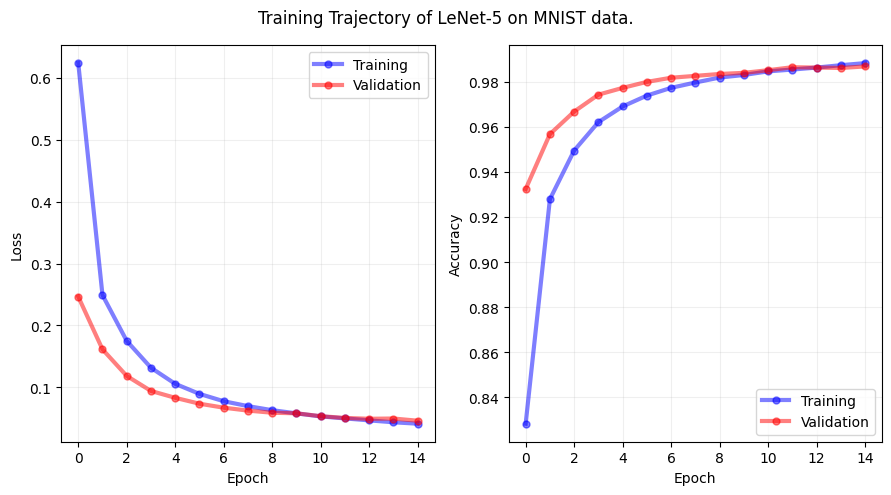

In [10]:
train_plot_kws = dict(linewidth=3., marker='o', markersize=5, alpha=.5, color='b')
valid_plot_kws = dict(linewidth=3., marker='o', markersize=5, alpha=.5, color='r')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))

axes[0].plot(history.history['loss'], label='Training', **train_plot_kws)
axes[0].plot(history.history['val_loss'], label='Validation', **valid_plot_kws)
axes[1].plot(history.history['accuracy'], label='Training', **train_plot_kws)
axes[1].plot(history.history['val_accuracy'], label='Validation', **valid_plot_kws)

axes[0].legend(loc='best')
axes[1].legend(loc='best')

axes[0].grid(True, alpha=.2)
axes[1].grid(True, alpha=.2)

axes[0].set_xlabel('Epoch')
axes[1].set_xlabel('Epoch')

axes[0].set_ylabel('Loss')
axes[1].set_ylabel('Accuracy')

fig.suptitle('Training Trajectory of LeNet-5 on MNIST data.')
fig.tight_layout(pad=1.01)

plt.show(fig)

In [11]:
test_loss, test_acc = lenet.evaluate(X_test, y_test, batch_size=512)
print("[Testing Performance] Loss: {:.4f} | Accuracy: {:.4f}".format(test_loss, test_acc))

20/20 [==============================] - 1s 21ms/step - loss: 0.0461 - accuracy: 0.9854
[Testing Performance] Loss: 0.0461 | Accuracy: 0.9854


# AlexNet (Krizhevsky et al., 2012)


*   The input to the model is a $227 \times 227 \times 3$ image.
*   It has five convolutional layers, three max pooling layers, and two fully-connected layers followed by a softmax classifier.
*   ReLU activations replaced with sigmoid & tanh activations.
*   Dropout was applied to the fully-connected layers to prevent overfitting.
*   Krizhevsky, A., Sutskever, I., & Hinton, G. E. (2012). Imagenet classification with deep convolutional neural networks. Advances in neural information processing systems, 25.

In [14]:
from keras.models import Sequential
from keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [15]:
def build_alexnet_model(input_shape=(227, 227, 3)):

    alexnet = Sequential()
    alexnet.add(InputLayer(input_shape=(227, 227, 3)))

    alexnet.add(Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu'))
    alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    alexnet.add(Conv2D(256, kernel_size=(5, 5), activation='relu', padding='same'))
    alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    alexnet.add(Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))
    alexnet.add(Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))
    alexnet.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
    alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    alexnet.add(Flatten())
    alexnet.add(Dense(4096, activation='relu'))
    alexnet.add(Dropout(0.5))
    alexnet.add(Dense(4096, activation='relu'))
    alexnet.add(Dropout(0.5))
    alexnet.add(Dense(1000, activation='softmax'))

    return alexnet

In [17]:
alexnet = build_alexnet_model()
alexnet.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 13, 13, 384)       885120    
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 384)      

# VGG-16 (Simonyan and Zisserman, 2014)


*   The input to the model is a $224 \times 224 \times 3$ image.
*   It demonstrated that using very small $3 \times 3$ convolution filters instead of larger ones (e.g., $7 \times 7$ or $11 \times 11$) are more effective in increasing the network depth.
*   Simonyan, K., & Zisserman, A. (2014). Very deep convolutional networks for large-scale image recognition. arXiv preprint arXiv:1409.1556.



In [23]:
from keras.models import Sequential
from keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense

In [18]:
def build_vgg16_model(input_shape=(224, 224, 3)):

    vgg16 = Sequential([

            # First Conv Block
            InputLayer(input_shape=input_shape),
            Conv2D(64, (3, 3), activation='relu', padding='same'),
            Conv2D(64, (3, 3), activation='relu', padding='same'),
            MaxPooling2D((2, 2), strides=(2, 2)),

            # Second Conv Block
            Conv2D(128, (3, 3), activation='relu', padding='same'),
            Conv2D(128, (3, 3), activation='relu', padding='same'),
            MaxPooling2D((2, 2), strides=(2, 2)),

            # Third Conv Block
            Conv2D(256, (3, 3), activation='relu', padding='same'),
            Conv2D(256, (3, 3), activation='relu', padding='same'),
            Conv2D(256, (3, 3), activation='relu', padding='same'),
            MaxPooling2D((2, 2), strides=(2, 2)),

            # Fourth Conv Block
            Conv2D(512, (3, 3), activation='relu', padding='same'),
            Conv2D(512, (3, 3), activation='relu', padding='same'),
            Conv2D(512, (3, 3), activation='relu', padding='same'),
            MaxPooling2D((2, 2), strides=(2, 2)),

            # Fifth Conv Block
            Conv2D(512, (3, 3), activation='relu', padding='same'),
            Conv2D(512, (3, 3), activation='relu', padding='same'),
            Conv2D(512, (3, 3), activation='relu', padding='same'),
            MaxPooling2D((2, 2), strides=(2, 2)),

            # Fully Connected Layers
            Flatten(),
            Dense(4096, activation='relu'),
            Dense(4096, activation='relu'),
            Dense(1000, activation='softmax')

        ])

    return vgg16

In [19]:
build_vgg16_model().summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_16 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_18 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                 

### Using Pre-trained Models

In [24]:
"""
    VGG models pre-trained on ImageNet are available.
        https://keras.io/api/applications/vgg/
"""

from keras.applications import VGG16

keras_vgg16 = VGG16(include_top=True,
                    weights='imagenet',
                    input_shape=(224, 224, 3),
                    classes=1000,
                    )

keras_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### Inference on any image

<img src='https://thumbs.dreamstime.com/b/golden-retriever-dog-21668976.jpg'>

In [26]:
import numpy as np
import requests
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
from PIL import Image
from io import BytesIO


def load_and_preprocess_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.resize((224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Replace this URL with the URL of the image you want to use
image_url = "https://thumbs.dreamstime.com/b/golden-retriever-dog-21668976.jpg"
img = load_and_preprocess_image_from_url(image_url)

In [31]:
img.shape  # a 4D tensor of shape (B, H, W, C)

(1, 224, 224, 3)

In [33]:
predictions = keras_vgg16.predict(img)

1/1 [==============================] - 2s 2s/step


In [35]:
predictions.shape

(1, 1000)

In [37]:
TOP_K = 10

decoded_predictions = decode_predictions(predictions, top=TOP_K)[0]
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.3f})")

1: golden_retriever (0.434)
2: Saluki (0.241)
3: Afghan_hound (0.136)
4: Great_Dane (0.052)
5: Labrador_retriever (0.030)
6: Rhodesian_ridgeback (0.025)
7: Irish_wolfhound (0.015)
8: briard (0.007)
9: Leonberg (0.006)
10: collie (0.005)


# ResNet-18 (He et al., 2015)

This is a residual network which uses skip connections to allow gradients to flow through the network without vanishing. It's more complex than VGG-16 and addresses the issue of training deeper networks.



*   **Skip connections** allow the input to a layer to be added to its output, effectively creating a shortcut path for the gradient during backpropagation. It helps in alleviating the vanishing gradient problem, as they provide an alternate path for the gradient to flow through the network.
*   **Global Average Pooling (GAP)** works by taking the average of each feature map from the preceding convolutional layer, effectively summarizing the spatial information. This strategy is beneficial because it enforces correspondences between feature maps and classification categories, which makes the internal representation of the network more interpretable and reduces the total number of parameters.
*   He, K., Zhang, X., Ren, S., & Sun, J. (2016). Deep residual learning for image recognition. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 770-778).



ResNet-18 architecture:

<img src='https://d2l.ai/_images/resnet18-90.svg'>


In [38]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Dense
from keras.layers import BatchNormalization, ReLU, Add
from keras.layers import GlobalAveragePooling2D

In [42]:
def residual_block(x, filters, reduce=False):

    # stride = (2, 2) will halve the spatial dimensions
    stride = (2, 2) if reduce else (1, 1)
    shortcut = x

    # First component of the main path
    x = Conv2D(filters, (3, 3), strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Second component of the main path
    x = Conv2D(filters, (3, 3), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)

    # Shortcut path
    if reduce:
        shortcut = Conv2D(filters, (1, 1), strides=stride, padding='valid')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    # Add shortcut to the main path
    x = Add()([x, shortcut])
    x = ReLU()(x)

    return x

<img src='https://d2l.ai/_images/resnet-block.svg'>

<img src="https://blog.kakaocdn.net/dn/becdhK/btru8HJKUHP/bFWFqKOpnMaKrk0H3BJOr1/img.png">

In [64]:
"""
    Use the Keras Functional API:
        https://keras.io/guides/functional_api/
"""


def build_resnet18_model(input_shape=(224, 224, 3), first_conv=7, num_classes=1000):

    input_tensor = Input(shape=input_shape)

    # Initial Conv Layer
    if first_conv == 7:
        x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(input_tensor)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    elif first_conv == 3:
        x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(input_tensor)
        x = BatchNormalization()(x)
        x = ReLU()(x)
    else:
        raise ValueError(f'first_conv={first_conv} is not supported.')

    # Residual Blocks
    x = residual_block(x, 64, reduce=False)
    x = residual_block(x, 64, reduce=False)

    x = residual_block(x, 128, reduce=True)
    x = residual_block(x, 128, reduce=False)

    x = residual_block(x, 256, reduce=True)
    x = residual_block(x, 256, reduce=False)

    x = residual_block(x, 512, reduce=True)
    x = residual_block(x, 512, reduce=False)

    # Global Average Pooling
    x = GlobalAveragePooling2D()(x)
    y = Dense(num_classes, activation='softmax')(x)

    resnet18 = Model(inputs=input_tensor, outputs=y)

    return resnet18

In [ ]:
build_resnet18_model().summary();

### CIFAR-10 data preprocessing

In [59]:
from keras.datasets import cifar10
import keras

# Load CIFAR10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

assert X_train.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

# Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

assert y_train.shape == (50000, 10)
assert y_test.shape == (10000, 10)

### Training ResNet-18 on CIFAR-10

In [ ]:
resnet18 = build_resnet18_model(input_shape=(32, 32, 3), first_conv=3, num_classes=10)
resnet18.summary()

In [81]:
from keras.optimizers import AdamW

optimizer = AdamW(learning_rate=0.001, weight_decay=0.0001)
resnet18.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = resnet18.fit(X_train, y_train,
                       epochs=30,
                       batch_size=128,
                       validation_split=0.1,)

Epoch 1/30
352/352 [==============================] - 85s 116ms/step - loss: 1.2855 - accuracy: 0.5423 - val_loss: 3.4193 - val_accuracy: 0.1516
Epoch 2/30
352/352 [==============================] - 41s 117ms/step - loss: 0.7820 - accuracy: 0.7257 - val_loss: 0.9715 - val_accuracy: 0.6802
Epoch 3/30
352/352 [==============================] - 42s 119ms/step - loss: 0.5786 - accuracy: 0.7982 - val_loss: 0.7941 - val_accuracy: 0.7292
Epoch 4/30
352/352 [==============================] - 41s 116ms/step - loss: 0.4428 - accuracy: 0.8462 - val_loss: 1.5762 - val_accuracy: 0.5908
Epoch 5/30
352/352 [==============================] - 41s 117ms/step - loss: 0.3392 - accuracy: 0.8801 - val_loss: 1.1124 - val_accuracy: 0.6858
Epoch 6/30
352/352 [==============================] - 42s 121ms/step - loss: 0.2595 - accuracy: 0.9076 - val_loss: 0.8923 - val_accuracy: 0.7516
Epoch 7/30
352/352 [==============================] - 41s 118ms/step - loss: 0.1881 - accuracy: 0.9323 - val_loss: 1.4540 - val_ac

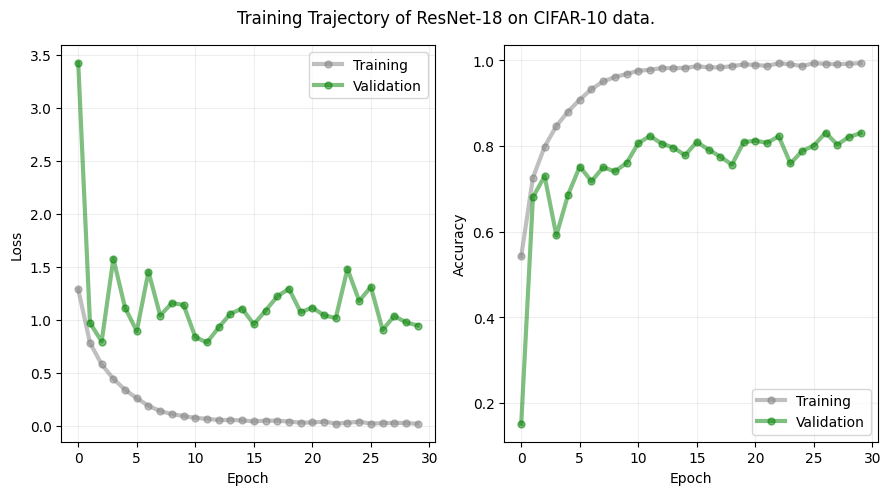

In [82]:
import matplotlib.pyplot as plt

train_plot_kws = dict(linewidth=3., marker='o', markersize=5, alpha=.5, color='gray')
valid_plot_kws = dict(linewidth=3., marker='o', markersize=5, alpha=.5, color='green')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))

axes[0].plot(history.history['loss'], label='Training', **train_plot_kws)
axes[0].plot(history.history['val_loss'], label='Validation', **valid_plot_kws)
axes[1].plot(history.history['accuracy'], label='Training', **train_plot_kws)
axes[1].plot(history.history['val_accuracy'], label='Validation', **valid_plot_kws)

axes[0].legend(loc='best')
axes[1].legend(loc='best')

axes[0].grid(True, alpha=.2)
axes[1].grid(True, alpha=.2)

axes[0].set_xlabel('Epoch')
axes[1].set_xlabel('Epoch')

axes[0].set_ylabel('Loss')
axes[1].set_ylabel('Accuracy')

fig.suptitle('Training Trajectory of ResNet-18 on CIFAR-10 data.')
fig.tight_layout(pad=1.01)

plt.show(fig)

In [ ]:
test_loss, test_acc = resnet18.evaluate(X_test, y_test, batch_size=512)
print("[Testing Performance] Loss: {:.4f} | Accuracy: {:.4f}".format(test_loss, test_acc))

### Using Pretrained Models



*   ResNet-18 is not provided as a pre-trained model.
*   Only ResNet-50 and deeper models are available under `keras.applications`.
*   For a exhaustive list of pretrained vision models: https://keras.io/api/applications/



In [75]:
from keras.applications.resnet50 import ResNet50

# Load ResNet50 model pre-trained on ImageNet
resnet50 = ResNet50(weights='imagenet',
                    include_top=True,
                    input_shape=(224, 224, 3),
                    classes=1000,
                    )

### Inference on any image

<img src="https://files.worldwildlife.org/wwfcmsprod/images/Tiger_resting_Bandhavgarh_National_Park_India/hero_small/6aofsvaglm_Medium_WW226365.jpg">

In [ ]:
import numpy as np
import requests
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from PIL import Image
from io import BytesIO

In [ ]:
def load_and_preprocess_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.resize((224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Replace this URL with the URL of the image you want to use
image_url = "https://files.worldwildlife.org/wwfcmsprod/images/Tiger_resting_Bandhavgarh_National_Park_India/hero_small/6aofsvaglm_Medium_WW226365.jpg"
img = load_and_preprocess_image_from_url(image_url)

In [76]:
predictions = resnet50.predict(img)

1/1 [==============================] - 1s 1s/step


In [77]:
predictions.shape

(1, 1000)

In [78]:
TOP_K = 10

decoded_predictions = decode_predictions(predictions, top=TOP_K)[0]
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.3f})")

1: tiger (0.601)
2: tiger_cat (0.396)
3: jaguar (0.001)
4: zebra (0.001)
5: prairie_chicken (0.001)
6: impala (0.000)
7: lynx (0.000)
8: leopard (0.000)
9: tabby (0.000)
10: gazelle (0.000)
